In [158]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from datetime import datetime
import numpy as np


In [152]:
steamdb_dir = 'data/steamdb'
dfs = dict()
for filename in os.listdir(steamdb_dir):
    f = os.path.join(steamdb_dir, filename)
    if os.path.isfile(f):
        df_name = filename[6:-4] # files manually saved as `chart-game.csv` -> game
        print(f'Adding df: {df_name}')
        dfs[df_name] = pd.read_csv(f, usecols=['DateTime', 'Players'])

Adding df: command-and-conquer
Adding df: stronghold
Adding df: AoE4
Adding df: company-of-heroes
Adding df: AoE3
Adding df: rise-of-nations
Adding df: AoE2-HD
Adding df: AoE2-DE
Adding df: total-war-warhammer-ii
Adding df: halo-wars
Adding df: northguard


In [153]:
# Clean data, impute Player counts for missing values
for game, df in dfs.items():
    print(game)
    df.set_index('DateTime')
    # df['Players'] = df['Players'].interpolate(method='linear', inplace=True)
    df.dropna(subset=['Players'], inplace=True)
    # df['Players'] = df['Players'].round()
    df = df.astype({'Players': int})

command-and-conquer
stronghold
AoE4
company-of-heroes
AoE3
rise-of-nations
AoE2-HD
AoE2-DE
total-war-warhammer-ii
halo-wars
northguard


In [189]:
# get update stats
patch_counts = pd.read_csv('data/patch_counts.csv')
patch_counts['days_since_launch'] = np.zeros(len(patch_counts))-1


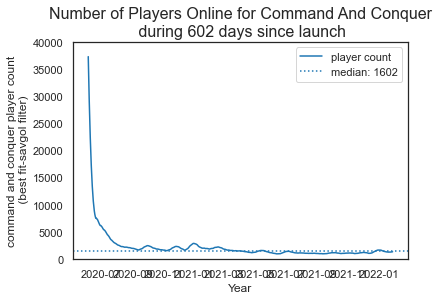

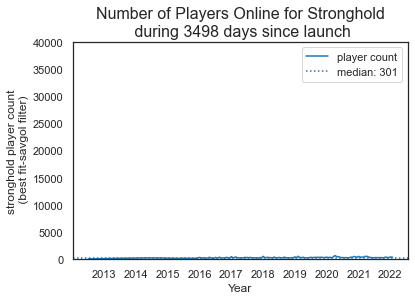

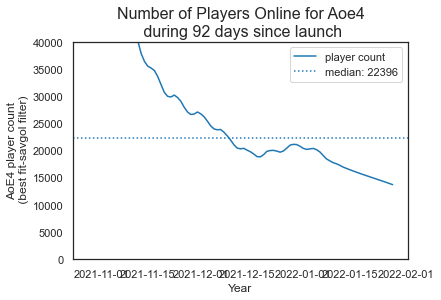

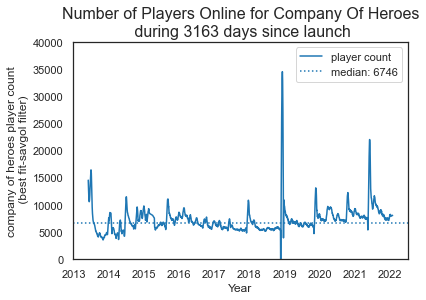

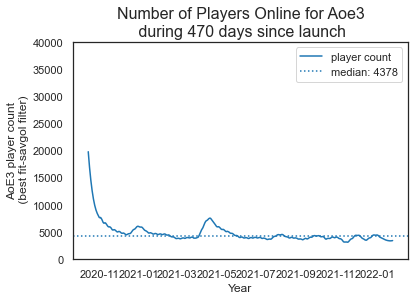

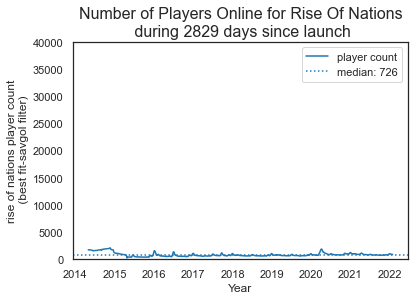

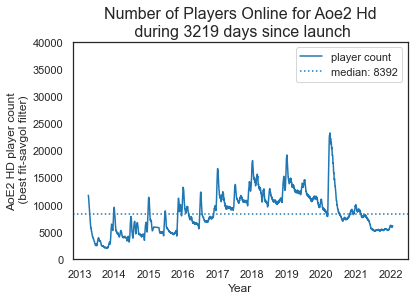

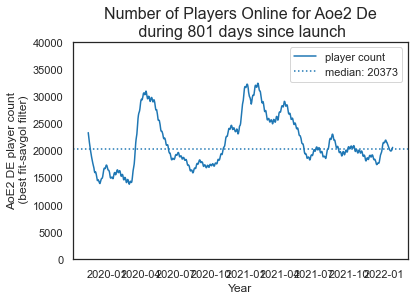

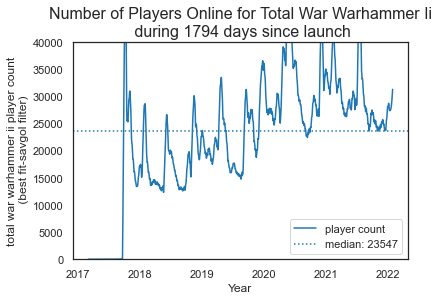

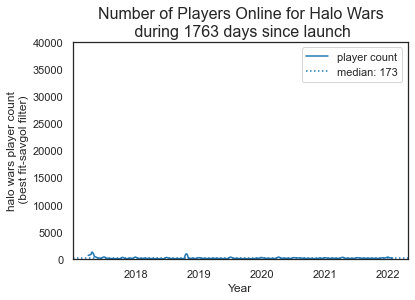

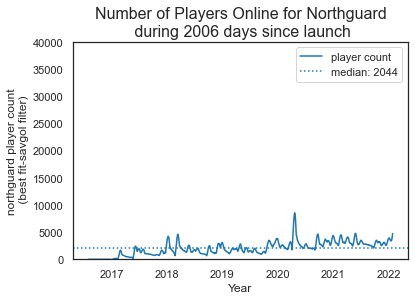

In [199]:
# Plot all games' player counts
# side effect! update days between updates TODO fix
for game, df in dfs.items():
    days = pd.to_datetime(df['DateTime'])
    min_ = datetime.strptime(df.DateTime.min(), "%Y-%m-%d %H:%M:%S")
    max_ = datetime.strptime(df.DateTime.max(), "%Y-%m-%d %H:%M:%S")
    delta = (max_ - min_).days

    # Update how long people have been playing this game and how many players play
    patch_counts.loc[patch_counts['name'] == game,'days_since_launch'] = delta
    median_players = int(round(df.Players.median(),0))
    patch_counts.loc[patch_counts['name'] == game,'median_players'] = median_players

    num_players_filtered = df[['Players']].apply(savgol_filter, window_length=31, polyorder=3)

    ax = plt.plot(days, num_players_filtered, label='player count')
    # plt.plot(days, df['Players']) # if we want actual player values
    plt.ylabel(f'{game.replace("-", " ")} player count\n (best fit-savgol filter)')
    plt.xlabel('Year')
    plt.axhline(median_players, linestyle=":", label=f"median: {median_players}")
    plt.title(f'Number of Players Online for {game.replace("-", " ").title()}\n '
              f'during {delta} days since launch', fontsize=16)
    plt.legend()
    axes = plt.gca()
    axes.set_ylim([0,40000])

    plt.show()


In [202]:
patch_counts # now updated with days_since_launch
patch_counts['days_between_updates'] = patch_counts.days_since_launch/patch_counts.num_updates
# patch_counts.sort_values(by='days_between_updates')
patch_counts.sort_values(by='median_players')

# patch_counts[['name', 'num_updates', 'days_between_updates', 'days_since_launch']].agg(['mean', 'median', 'std'])

,steam_app_id,name,num_updates,days_since_launch,days_between_updates,median_players
1,459220,halo-wars,8,1763.0,220.375000,173.0
8,40950,stronghold,24,3498.0,145.750000,301.0
5,287450,rise-of-nations,17,2829.0,166.411765,726.0
3,1213210,command-and-conquer,6,602.0,100.333333,1602.0
4,466560,northguard,398,2006.0,5.040201,2044.0
0,933110,AoE3,31,470.0,15.161290,4378.0
7,231430,company-of-heroes,211,3163.0,14.990521,6746.0
10,221380,AoE2-HD,79,3219.0,40.746835,8392.0
9,813780,AoE2-DE,40,801.0,20.025000,20373.0
2,1466860,AoE4,7,92.0,13.142857,22396.0


In [19]:
# dfs['stronghold']

,DateTime,Players
0,2001-10-19 00:00:00,NaN
1,2012-07-01 00:00:00,86.0
2,2012-07-02 00:00:00,NaN
3,2012-07-03 00:00:00,NaN
4,2012-07-04 00:00:00,NaN
...,...,...
3495,2022-01-24 00:00:00,397.0
3496,2022-01-25 00:00:00,362.0
3497,2022-01-26 00:00:00,366.0
3498,2022-01-27 00:00:00,356.0
